<a href="https://colab.research.google.com/github/SamikshaBhavsar/The_sparks_Foundation/blob/master/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name : SAMIKSHA BHAVSAR**

**Task 3 - To Explore Unsupervised Machine Learning**



**From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.**

**Importing required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Importing Dataset**

In [ ]:
#iris = datasets.load_iris()
#df = pd.DataFrame(iris.data, columns = iris.feature_names)
df = pd.read_csv("https://raw.githubusercontent.com/SamikshaBhavsar/The_sparks_Foundation/master/Iris.csv")
print("Data imported successfully")

Data imported successfully


In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


**Exploratory Data Analysis**

In [ ]:
df.shape

(150, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


**Checking the count the species of flowers**

In [ ]:
 print(df['Species'].unique())

print('\n''Quantity of the Species :-''\n',df['Species'].value_counts())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Quantity of the Species :-
 Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64


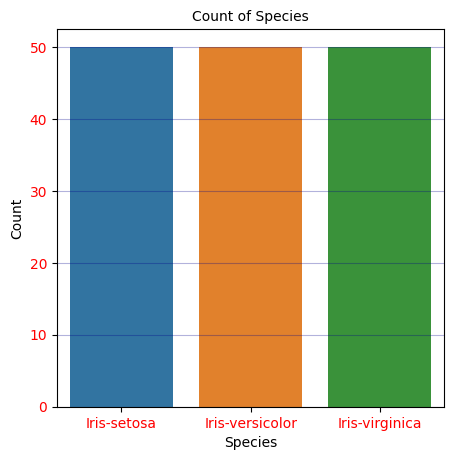

In [ ]:
plt.figure(figsize = (5,5), dpi = 100)
plt.grid(color = 'darkBlue', alpha = 0.3)

sns.countplot('Species',data = df)
plt.yticks(fontsize=10,color = 'red')
plt.xticks(fontsize=10,color = 'red')
plt.title('Count of Species',color='black',size = 10)
plt.xlabel('Species',color='black',size = 10)
plt.ylabel('Count',color='black',size = 10)

plt.show()

**Pair Plot**

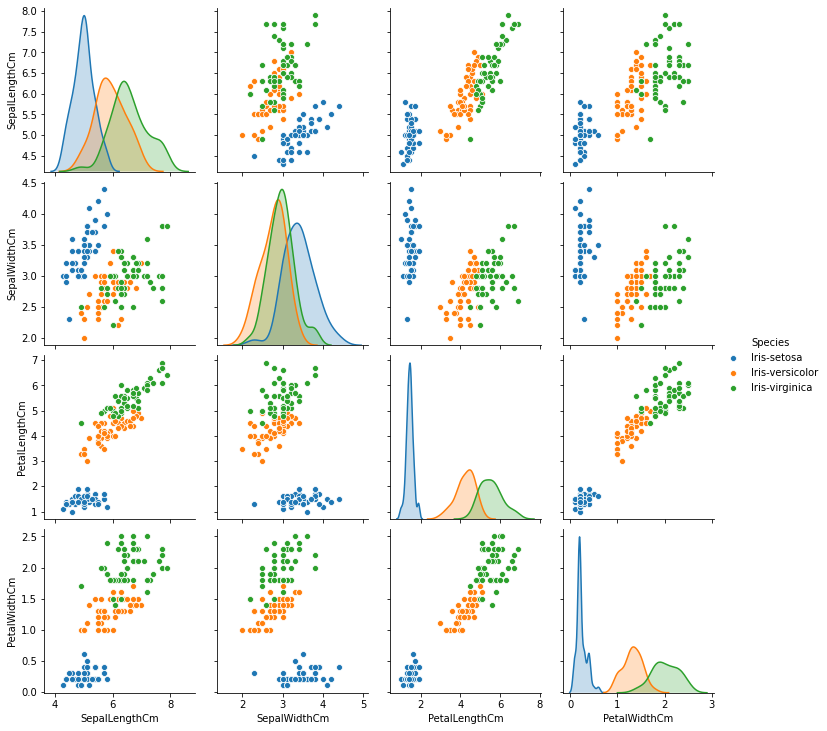

In [ ]:
sns.pairplot(df.iloc[:,[1,2,3,4,5]],hue='Species')

**Heatmap**

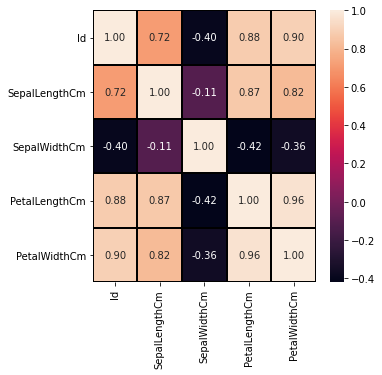

In [ ]:
corr = df.corr()
fig,ax = plt.subplots(figsize=(5,5))

sns.heatmap(corr,annot=True,fmt="0.2f",linewidth=1,linecolor="Black",ax=ax)
plt.show()

**Distplot**

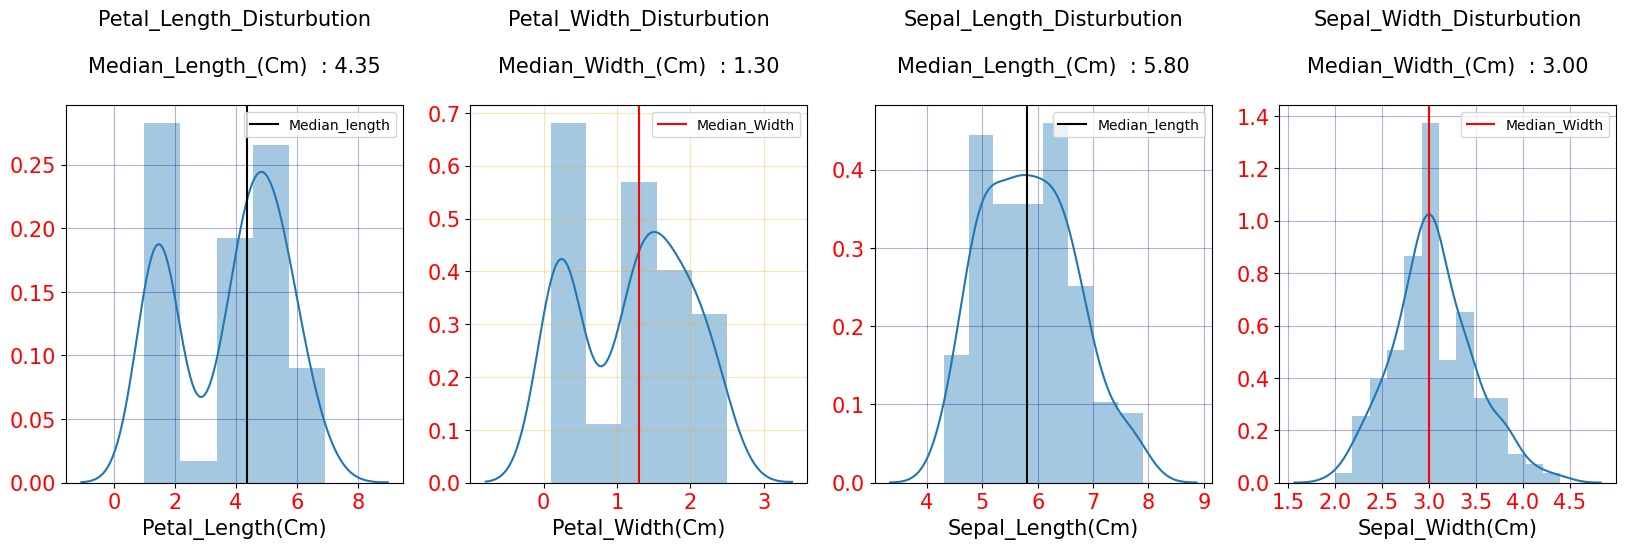

In [ ]:
Fig = plt.figure(figsize = (20,5), dpi = 100)
Axis1 = plt.subplot(1, 4, 1)

g = sns.distplot(df['PetalLengthCm'], ax=Axis1)
plt.grid(color = 'darkBlue', alpha = 0.3)
Axis1.set_xlabel('Petal_Length(Cm)' ,color='black',size = 15)
Axis1.set_title('Petal_Length_Disturbution' '\n' '\n' 'Median_Length_(Cm)  : {0:.2f}' '\n' .format(df['PetalLengthCm'].median()),color='black',size = 15)
g.axvline(df['PetalLengthCm'].median(),color = 'black',label = 'Median_length')
Axis1.legend()
plt.yticks(fontsize=15,color = 'red')
plt.xticks(fontsize=15,color = 'red')

Axis2 = plt.subplot(1, 4, 2)
g = sns.distplot(df['PetalWidthCm'], ax=Axis2)
plt.grid(color = 'orange', alpha = 0.3)
Axis2.set_xlabel('Petal_Width(Cm)' ,color='black',size = 15)
Axis2.set_title('Petal_Width_Disturbution' '\n' '\n' 'Median_Width_(Cm)  : {0:.2f}' '\n' .format(df['PetalWidthCm'].median()),color='black',size = 15)
g.axvline(df['PetalWidthCm'].median(),color = 'red',label = 'Median_Width')
Axis2.legend()
plt.yticks(fontsize=15,color = 'red')
plt.xticks(fontsize=15,color = 'red')

Axis3 = plt.subplot(1, 4, 3)
g = sns.distplot(df['SepalLengthCm'], ax=Axis3)
plt.grid(color = 'green', alpha = 0.3)
Axis3.set_xlabel('Sepal_Length(Cm)' ,color='black',size = 15)
Axis3.set_title('Sepal_Length_Disturbution' '\n' '\n' 'Median_Length_(Cm)  : {0:.2f}' '\n' .format(df['SepalLengthCm'].median()),color='black',size = 15)
g.axvline(df['SepalLengthCm'].median(),color = 'black',label = 'Median_length')
Axis3.legend()
plt.yticks(fontsize=15,color = 'red')
plt.xticks(fontsize=15,color = 'red')
plt.grid(color = 'darkBlue', alpha = 0.3)


Axis4 = plt.subplot(1, 4, 4)
g = sns.distplot(df['SepalWidthCm'], ax=Axis4)
plt.grid(color = 'red', alpha = 0.3)
Axis4.set_xlabel('Sepal_Width(Cm)' ,color='black',size = 15)
Axis4.set_title('Sepal_Width_Disturbution' '\n' '\n' 'Median_Width_(Cm)  : {0:.2f}' '\n' .format(df['SepalWidthCm'].median()),color='black',size = 15)
g.axvline(df['SepalWidthCm'].median(),color = 'red',label = 'Median_Width')
Axis4.legend()
plt.yticks(fontsize=15,color = 'red')
plt.xticks(fontsize=15,color = 'red')
plt.grid(color = 'darkBlue', alpha = 0.3)

plt.show()

**Splitting the dataset into Features and Labels**

In [ ]:
X = df.iloc[:, 0:4].values

**How to find the optimum number of clusters for K Means? How does one determine the value of K?**


**We can use the Elbow method**

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

**Plotting results as line plot to see 'The Elbow'**

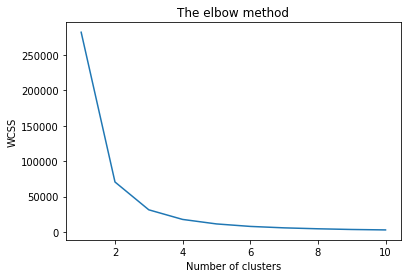

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can clearly see the point in the graph from where WCSS does not decrease significantly.



**The point is '3' which is the optimum number of clusters for dataset.**

**Training the model(K-Means) to find optimum clusters with help of WCSS (Within Cluster Sum of Squares)**

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                 n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)


**Visualising the clusters - On the first two columns**

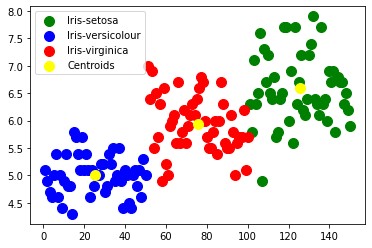

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'red', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

**Visualization for Sepal's Width and length**

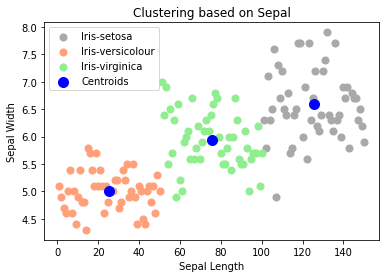

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'darkgrey', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'lightsalmon', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'lightgreen', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'blue', label = 'Centroids')
plt.title('Clustering based on Sepal')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

**Visualization for Petal's Width and length**



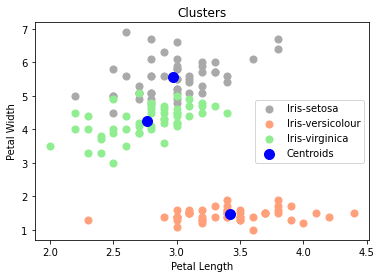

In [ ]:
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], s = 50, c = 'darkgrey', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], s = 50, c = 'lightsalmon', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3], s = 50, c = 'lightgreen', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 100, c = 'blue', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

